# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [2]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [19]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [21]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
2**8

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_2516\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


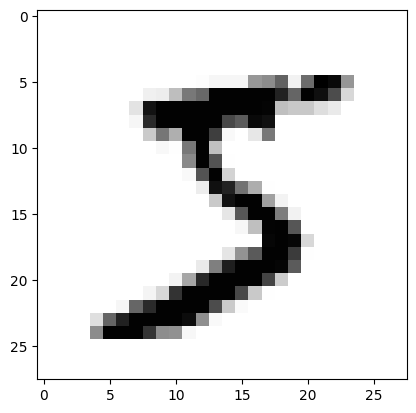

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [25]:
np.max(X_train)

255

In [26]:
0/255

0.0

In [27]:
128/255

0.5019607843137255

In [28]:
255/255

1.0

In [29]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [30]:
np.mean(X_train)

0.13066062

In [31]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [33]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [35]:
28*28

784

In [36]:
X_train.shape

(50000, 28, 28)

In [17]:
28*28

784

In [39]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [40]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [41]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [43]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.07000935, -0.01570813,  0.05609965, ...,  0.05186507,
         0.0039544 , -0.03760503],
       [-0.0374433 ,  0.02414865, -0.04913577, ..., -0.00071819,
        -0.07389734, -0.07403124],
       [ 0.01045132, -0.02342552, -0.01363755, ..., -0.03862363,
         0.07259874,  0.06267877],
       ...,
       [ 0.05183624,  0.03152754, -0.06924748, ..., -0.00107355,
         0.05507182, -0.02244285],
       [-0.04077723, -0.0498422 , -0.03065461, ..., -0.05667526,
        -0.05628294, -0.03612458],
       [ 0.05347902, -0.07288817,  0.03784343, ..., -0.03681912,
         0.01385988, -0.05467883]], dtype=float32)

In [44]:
len(weights)

784

In [45]:
len(weights[0])

300

In [33]:
28*28

784

In [46]:
300*784

235200

In [27]:
weights.size

235200

In [47]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [49]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [51]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [52]:
# Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
784 * 300 + 300

235500

In [55]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [56]:
300 * 784 + 300

235500

In [57]:
300 * 100 + 100

30100

In [58]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [59]:
X_train.shape

(50000, 28, 28)

In [61]:
50000/128

390.625

In [62]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50


391/391 [==============================] - 4s 7ms/step - loss: 1.2354 - accuracy: 0.6847 - val_loss: 0.6057 - val_accuracy: 0.8564
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5212 - accuracy: 0.8643 - val_loss: 0.3996 - val_accuracy: 0.8981
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4013 - accuracy: 0.8896 - val_loss: 0.3365 - val_accuracy: 0.9069
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3512 - accuracy: 0.9013 - val_loss: 0.3046 - val_accuracy: 0.9143
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3211 - accuracy: 0.9091 - val_loss: 0.2844 - val_accuracy: 0.9193
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.2998 - accuracy: 0.9152 - val_loss: 0.2681 - val_accuracy: 0.9236
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 0.2827 - accuracy: 0.9197 - val_loss: 0.2559 - val_accuracy: 0.9273
Epo

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [63]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0843 - accuracy: 0.9765 - val_loss: 0.1071 - val_accuracy: 0.9695
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0812 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9697
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0784 - accuracy: 0.9788 - val_loss: 0.1028 - val_accuracy: 0.9708
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0751 - accuracy: 0.9793 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0726 - accuracy: 0.9804 - val_loss: 0.1006 - val_accuracy: 0.9711
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0701 - accuracy: 0.9810 - val_loss: 0.0986 - val_accuracy: 0.9714
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0678 - accuracy: 0.9817 - val_loss: 0.0971 - val_accuracy: 0.9718
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [64]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.2353726625442505, 0.5211768746376038, 0.4012887477874756, 0.35121262073516846, 0.3211060166358948, 0.2998276650905609, 0.2827205955982208, 0.2686437666416168, 0.25638362765312195, 0.24533064663410187, 0.23514188826084137, 0.22615736722946167, 0.217967689037323, 0.20991000533103943, 0.2028186321258545, 0.19609487056732178, 0.1895434707403183, 0.1837456226348877, 0.1783130019903183, 0.17288483679294586, 0.16783970594406128, 0.1631193608045578, 0.15839903056621552, 0.1541978120803833, 0.15001195669174194, 0.1460249125957489, 0.14229816198349, 0.13867753744125366, 0.13519218564033508, 0.13187257945537567, 0.12856869399547577, 0.12555593252182007, 0.12269985675811768, 0.11979465931653976, 0.11700628697872162, 0.11440829932689667, 0.11176930367946625, 0.10939221829175949, 0.10686624050140381, 0.10460074990987778, 0.10236592590808868, 0.10019351541996002, 0.09808506816625595, 0.09615372121334076, 0.09419214725494385, 0.09214089810848236, 0.0903773307800293, 0.08850029110908508, 0.

In [65]:
history.history

{'loss': [1.2353726625442505,
  0.5211768746376038,
  0.4012887477874756,
  0.35121262073516846,
  0.3211060166358948,
  0.2998276650905609,
  0.2827205955982208,
  0.2686437666416168,
  0.25638362765312195,
  0.24533064663410187,
  0.23514188826084137,
  0.22615736722946167,
  0.217967689037323,
  0.20991000533103943,
  0.2028186321258545,
  0.19609487056732178,
  0.1895434707403183,
  0.1837456226348877,
  0.1783130019903183,
  0.17288483679294586,
  0.16783970594406128,
  0.1631193608045578,
  0.15839903056621552,
  0.1541978120803833,
  0.15001195669174194,
  0.1460249125957489,
  0.14229816198349,
  0.13867753744125366,
  0.13519218564033508,
  0.13187257945537567,
  0.12856869399547577,
  0.12555593252182007,
  0.12269985675811768,
  0.11979465931653976,
  0.11700628697872162,
  0.11440829932689667,
  0.11176930367946625,
  0.10939221829175949,
  0.10686624050140381,
  0.10460074990987778,
  0.10236592590808868,
  0.10019351541996002,
  0.09808506816625595,
  0.09615372121334076,

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.235373,0.68468,0.605686,0.8564
1,0.521177,0.86432,0.399646,0.8981
2,0.401289,0.88960,0.336457,0.9069
3,0.351213,0.90128,0.304616,0.9143
4,0.321106,0.90912,0.284396,0.9193
5,0.299828,0.91518,0.268097,0.9236
6,0.282721,0.91966,0.255854,0.9273
7,0.268644,0.92422,0.244280,0.9311
8,0.256384,0.92730,0.235321,0.9321
9,0.245331,0.93094,0.226379,0.9363


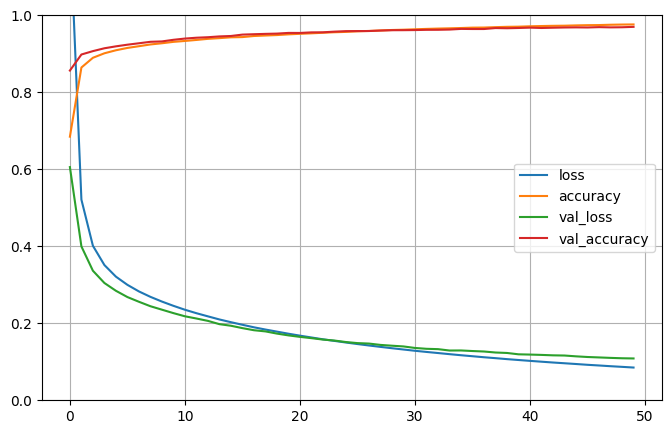

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [69]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9731


[0.08990992605686188, 0.9731000065803528]

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_2516\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


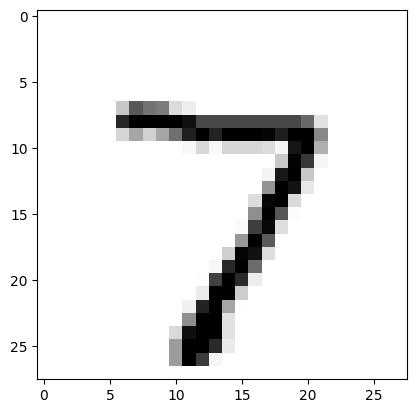

In [70]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [71]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [72]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
np.round(predictions,3)

1/1 [==============================] - 0s 126ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [73]:
predictions.argmax()

7

In [74]:
X_test.shape[0]

10000

In [76]:
X_test.shape[0]/32

312.5

In [77]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_2516\4029188365.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


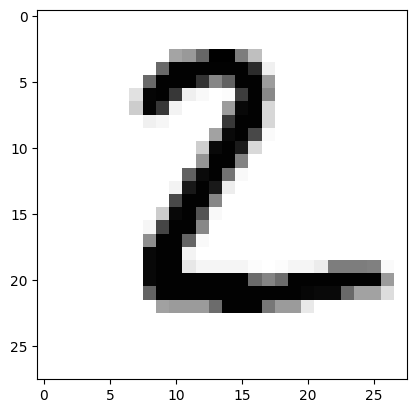

In [78]:
plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 [==============================] - 1s 3ms/step


array([[ 964,    0,    2,    1,    1,    3,    4,    1,    3,    1],
       [   0, 1121,    2,    1,    0,    2,    3,    1,    5,    0],
       [   4,    1, 1006,    4,    3,    0,    1,    5,    8,    0],
       [   0,    0,    3,  991,    0,    3,    0,    3,    9,    1],
       [   2,    0,    5,    0,  959,    0,    1,    2,    1,   12],
       [   6,    1,    0,    9,    2,  856,    7,    1,    8,    2],
       [   5,    3,    0,    1,    3,    9,  933,    1,    3,    0],
       [   2,   10,   11,    5,    1,    0,    0,  990,    2,    7],
       [   3,    0,    6,    5,    3,    3,    4,    3,  946,    1],
       [   5,    7,    2,    9,    9,    1,    1,    5,    5,  965]],
      dtype=int64)

In [80]:
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       980
         1.0       0.98      0.99      0.98      1135
         2.0       0.97      0.97      0.97      1032
         3.0       0.97      0.98      0.97      1010
         4.0       0.98      0.98      0.98       982
         5.0       0.98      0.96      0.97       892
         6.0       0.98      0.97      0.98       958
         7.0       0.98      0.96      0.97      1028
         8.0       0.96      0.97      0.96       974
         9.0       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [81]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [82]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [84]:
11610/32

362.8125

In [85]:
X_train.shape[1:]

(8,)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7947 - val_loss: 8.4268
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5248 - val_loss: 0.5846
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4280 - val_loss: 0.4311
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4319 - val_loss: 0.4779
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4378 - val_loss: 0.4251
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4270 - val_loss: 0.4126
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3930 - val_loss: 0.5682
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4114 - val_loss: 0.4129
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3837 - val_loss: 0.4849
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - val_loss: 0.3847

In [87]:
8*30 + 30

270

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3663
0.3662945330142975


In [90]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 79ms/step


array([[2.6921997 ],
       [3.0802212 ],
       [0.79800755],
       [2.9747157 ],
       [4.5573835 ]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [91]:
model.save("my_keras_model.h5")

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [93]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3548
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3531
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3520
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3526
Epoch 5/30
352/363 [============================>.] - ETA: 0s - loss: 0.3535

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3488 - val_loss: 0.3694
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3906
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3469 - val_loss: 0.3856
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3456 - val_loss: 0.3892
